## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
with open ('results.csv',encoding='utf-8') as f:
    football=pd.read_csv(f)

In [5]:
football.head()
df=football.copy()

In [4]:
a=football[football.tournament=='FIFA World Cup'].groupby('home_team', as_index=False).agg({"home_score": "sum"})

In [5]:
ab=football[football.tournament=='FIFA World Cup'].groupby('away_team', as_index=False).agg({"away_score": "sum"})

In [6]:
a.isnull().sum()

home_team     0
home_score    0
dtype: int64

In [10]:
ab.rename(columns={'away_team':'country'}, inplace=True)
ab.country

0                  Algeria
1                   Angola
2                Argentina
3                Australia
4                  Austria
              ...         
74    United Arab Emirates
75           United States
76                 Uruguay
77                   Wales
78              Yugoslavia
Name: country, Length: 79, dtype: object

In [8]:
football[(football.tournament=='FIFA World Cup')&(football.away_team=='Algeria') ]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
12271,1982-06-16,Germany,Algeria,1,2,FIFA World Cup,Gijón,Spain,True
14211,1986-06-06,Brazil,Algeria,1,0,FIFA World Cup,Guadalajara,Mexico,True
32152,2010-06-18,England,Algeria,0,0,FIFA World Cup,Cape Town,South Africa,True
32177,2010-06-23,United States,Algeria,1,0,FIFA World Cup,Pretoria,South Africa,True
36102,2014-06-17,Belgium,Algeria,2,1,FIFA World Cup,Belo Horizonte,Brazil,True
36121,2014-06-22,South Korea,Algeria,2,4,FIFA World Cup,Porto Alegre,Brazil,True
36146,2014-06-30,Germany,Algeria,2,1,FIFA World Cup,Porto Alegre,Brazil,True


In [13]:
# goal.groupby('country', as_index=False).agg({"home_score": "sum","away_score": "sum"})
a.rename(columns={'home_team':'country'}, inplace=True)
a.head()
goal = pd.merge(ab,a,how= 'left',on='country')
goal.head()

,country,away_score,home_score
0,Algeria,8,5.0
1,Angola,1,0.0
2,Argentina,23,114.0
3,Australia,6,7.0
4,Austria,13,30.0


In [14]:
goal['Total_score']=goal['home_score']+ goal['away_score']
goal.sort_values(by='Total_score',ascending=False).head(10)

,country,away_score,home_score,Total_score
8,Brazil,52,177.0,229.0
27,Germany,68,158.0,226.0
2,Argentina,23,114.0,137.0
37,Italy,56,72.0,128.0
25,France,35,85.0,120.0
66,Spain,50,49.0,99.0
24,England,41,50.0,91.0
76,Uruguay,56,31.0,87.0
32,Hungary,38,49.0,87.0
44,Netherlands,44,42.0,86.0


In [15]:
top10= goal.sort_values(by='Total_score',ascending=False).head(10)

## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [16]:
top10.head()

,country,away_score,home_score,Total_score
8,Brazil,52,177.0,229.0
27,Germany,68,158.0,226.0
2,Argentina,23,114.0,137.0
37,Italy,56,72.0,128.0
25,France,35,85.0,120.0


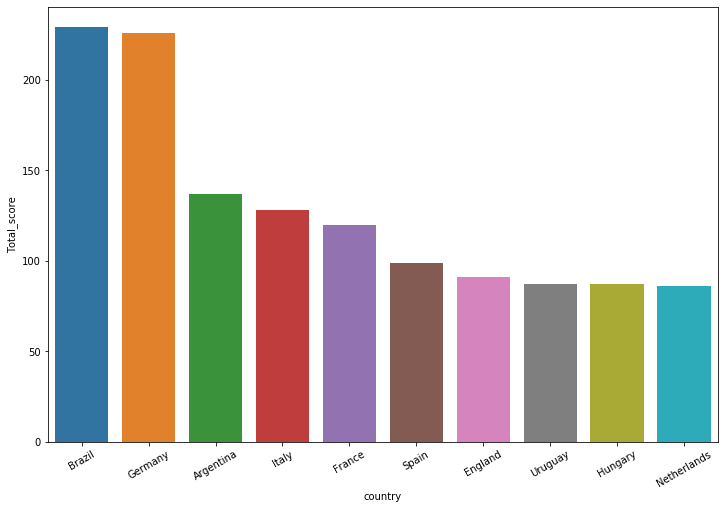

In [17]:
fig, ax= plt.subplots(figsize=(12,8))
sns.barplot(top10.country,top10.Total_score)
plt.xticks(rotation=30)
plt.show()

## Task
What is the number of matches played in each tournament throughout history?

In [18]:
football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [20]:
tourna=football.groupby('tournament', as_index=False)['date'].count()
top=tourna.sort_values(by='date',ascending=False).head(10)
bottom=tourna.sort_values(by='date',ascending=True).head(10)
bottom.head()

,tournament,date
31,Copa América qualification,2
13,Atlantic Heritage Cup,2
6,AFF Championship qualification,2
49,Dragon Cup,4
83,OSN Cup,4


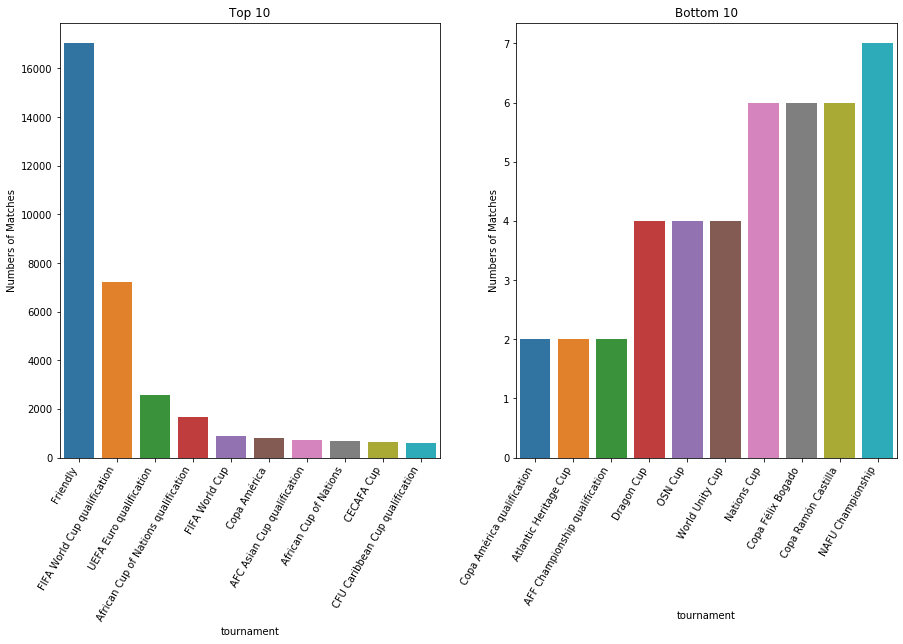

In [21]:
fig, ((ax1,ax2)) = plt.subplots(1,2,figsize=(15,8))
sns.barplot(top.tournament,top.date, ax=ax1).set_title('Top 10')
ax1.set_xticklabels(top.tournament, rotation = 60,horizontalalignment='right')
ax1.set(ylabel='Numbers of Matches')

sns.barplot(bottom.tournament,bottom.date, ax=ax2).set_title('Bottom 10')
ax2.set(ylabel='Numbers of Matches')
ax2.set_xticklabels(bottom.tournament, rotation = 60,horizontalalignment='right')
plt.show()


## Task 
Show the trend in number of matches per year.

In [170]:
football.date = pd.to_datetime(football.date)
df_foot=football.copy()

In [ ]:
football['Year']= football.date.dt.year

In [ ]:
Nos_matches = football.groupby('Year', as_index=False)['date'].count()
Nos_matches.head()

In [ ]:
Nos_matches.sort_values(by='date',ascending= False).head()

In [ ]:
football[football['Year']== 2020]

In [54]:
trace2 = go.Scatter(
    x = Nos_matches.Year,
    y = Nos_matches.date,
    mode = 'lines',
    name = 'lines'
)
# create the layout
layout = go.Layout(
    title = 'Matche distrubution',
    xaxis = dict(title = 'Year of Matches', dtick=5,tickangle=45), # x-axis label
    yaxis = dict(title = 'Count of Matches') )
fig.update_xaxes(range=[1.5, 4.5])
# crate the fig
fig = go.Figure(data=trace2,layout=layout)
fig.show()

## Task
Which teams are the most successful ones? (winning percentage)

In [24]:
def wins_home(foot):
    if foot['home_score'] > foot['away_score']:
        return 'Win'
    elif foot['home_score'] < foot['away_score']:
        return 'loses'
    elif foot['home_score']==foot['away_score']:
        return 'Drew'
def wins_away(foot):
    if foot['home_score'] < foot['away_score']:
        return 'Win'
    elif foot['home_score'] > foot['away_score']:
        return 'loses'
    elif foot['home_score']==foot['away_score']:
        return 'Drew'

In [46]:
foot=football.copy()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
25683,2003-06-29,Guernsey,Alderney,7,1,Island Games,St. Sampson,Guernsey,False
25703,2003-07-01,Orkney,Alderney,3,1,Island Games,St. Sampson,Guernsey,True
25715,2003-07-03,Alderney,Greenland,0,3,Island Games,St. Sampson,Guernsey,True
25721,2003-07-04,Saare County,Alderney,0,1,Island Games,St. Martin,Guernsey,True
33105,2011-06-26,Alderney,Gibraltar,1,6,Island Games,Newport,England,True


In [25]:
foot['home_statues']=foot.apply(wins_home,axis=1)
foot['away_statues']=foot.apply(wins_away,axis=1)
# foot['away_statues']=wins(foot['away_score'],foot['home_score'])

In [36]:
coool=['date', 'home_team', 'away_team', 'home_score', 'away_score', 'home_statues',
       'away_statues']
winner=foot[coool]
winner.head()
# winner.groupby(['home_team', 'home_statues'],as_index= False).home_statues.value_counts()
# winner.home_statues.value_counts()

,date,home_team,away_team,home_score,away_score,home_statues,away_statues
0,1872-11-30,Scotland,England,0,0,Drew,Drew
1,1873-03-08,England,Scotland,4,2,Win,loses
2,1874-03-07,Scotland,England,2,1,Win,loses
3,1875-03-06,England,Scotland,2,2,Drew,Drew
4,1876-03-04,Scotland,England,3,0,Win,loses


In [38]:
winner_home=winner.groupby(['home_team','home_statues'], as_index=False)['date'].count()

In [37]:
winner_away=winner.groupby(['away_team','away_statues'], as_index=False)['date'].count()

In [125]:
ald=winner[(winner.home_team=='Vatican City') | (winner.away_team=='Vatican City')]
ald.sort_values(["home_team",'home_statues'])

,date,home_team,away_team,home_score,away_score,home_statues,away_statues
25157,2002-11-23,Monaco,Vatican City,0,0,Drew,Drew
32966,2011-05-07,Monaco,Vatican City,2,1,Win,loses
35265,2013-06-22,Monaco,Vatican City,2,0,Win,loses
33084,2011-06-12,Palestine,Vatican City,9,1,Win,loses
38765,2017-04-29,Vatican City,Monaco,0,0,Drew,Drew
35905,2014-05-10,Vatican City,Monaco,0,2,loses,Win


In [101]:
winner_home.rename(columns={'home_team':'country'}, inplace=True)
winner_away.rename(columns={'away_team':'country','away_statues':'home_statues'}, inplace=True)
# winner_away.rename(columns={}, inplace=True)

In [102]:
display_side_by_side(winner_home.head(),winner_away.head())

,country,home_statues,date
0,Abkhazia,Drew,7
1,Abkhazia,Win,9
2,Abkhazia,loses,2
3,Afghanistan,Drew,8
4,Afghanistan,Win,17
,country,home_statues,date
0,Abkhazia,Drew,5
1,Abkhazia,Win,3
2,Abkhazia,loses,2
3,Afghanistan,Drew,16


In [103]:
# pd.merge(winner_home,winner_away,how= 'left',left_on='home_team',right_on='away_team')
update=pd.concat([winner_home,winner_away])
update.isna().sum()

country         0
home_statues    0
date            0
dtype: int64

In [105]:
update.head()

,country,home_statues,date
0,Abkhazia,Drew,7
1,Abkhazia,Win,9
2,Abkhazia,loses,2
3,Afghanistan,Drew,8
4,Afghanistan,Win,17


In [127]:
Total_match=update.groupby(['country'], as_index=False).agg({"date": "sum"})
Total_match.rename(columns={'date':'Total Matches'}, inplace=True)
Total_match.head()

,country,Total Matches
0,Abkhazia,28
1,Afghanistan,111
2,Albania,332
3,Alderney,19
4,Algeria,505


In [107]:
Match_stas=update.groupby(['country','home_statues'], as_index=False).agg({"date": "sum"})

In [129]:
# .sort_values('date', ascending = False)
Winss=Match_stas[Match_stas.home_statues=='Win']
Total_match.country[~Total_match.country.isin(Winss.country)]
display_side_by_side(Total_match.head(),Winss.head())


country 
 Total Matches 
 
 
 
 
 0 
 Abkhazia 
 28 
 
 
 1 
 Afghanistan 
 111 
 
 
 2 
 Albania 
 332 
 
 
 3 
 Alderney 
 19 
 
 
 4 
 Algeria 
 505 
 
 
 
 
 
 
 country 
 home_statues 
 date 
 
 
 
 
 105 
 Brazil 
 Win 
 625 
 
 
 247 
 England 
 Win 
 572 
 
 
 303 
 Germany 
 Win 
 555 
 
 
 36 
 Argentina 
 Win 
 526 
 
 
 753 
 Sweden 
 Win 
 500

(300, 3)

In [134]:
win_total=pd.merge(Winss,Total_match,how= 'inner',on='country')
win_total.head()
win_total['Percent_wins']=(win_total.date/win_total['Total Matches'])*100
win_total.head()

,country,home_statues,date,Total Matches,Percent_wins
0,Brazil,Win,625,981,63.710499
1,England,Win,572,1009,56.689792
2,Germany,Win,555,949,58.482613
3,Argentina,Win,526,980,53.673469
4,Sweden,Win,500,1018,49.115914


In [135]:
win_total[win_total['To']].sort_values('Percent_wins',ascending = False).head(15)

,country,home_statues,date,Total Matches,Percent_wins
294,Asturias,Win,1,1,100.000000
286,Surrey,Win,1,1,100.000000
271,Canary Islands,Win,3,4,75.000000
253,Yorkshire,Win,5,7,71.428571
190,Padania,Win,29,43,67.441860
150,Jersey,Win,55,82,67.073171
283,Parishes of Jersey,Win,2,3,66.666667
241,County of Nice,Win,6,9,66.666667
178,Basque Country,Win,37,57,64.912281
0,Brazil,Win,625,981,63.710499


In [122]:
# winner.rename(columns={'home_statues':'Stas'}, inplace=True)
winner.head()
# winner.reset_index('home_statues')

Stas
home_team   home_statues      
Abkhazia    Drew             7
            Win              9
            loses            2
Afghanistan Drew             8
            Win             17

In [127]:
# winner.pivot(columns='home_statues', values='Stas')
winner=winner.unstack()
winner.head(15)

Stas             
home_statues          Drew    Win loses
home_team                              
Abkhazia               7.0    9.0   2.0
Afghanistan            8.0   17.0  15.0
Albania               42.0   62.0  71.0
Alderney               NaN    NaN   7.0
Algeria               72.0  161.0  59.0
American Samoa         2.0    4.0  18.0
Andalusia              4.0    7.0   1.0
Andorra               11.0    6.0  66.0
Angola                56.0   82.0  33.0
Anguilla               2.0    2.0  17.0
Antigua and Barbuda   20.0   47.0  42.0
Arameans Suryoye       1.0    1.0   1.0
Argentina            119.0  361.0  68.0
Armenia               26.0   32.0  46.0
Artsakh                1.0    4.0   2.0

## Task
Which teams are the least successful ones? (winning percentage)

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

In [171]:
month=df_foot.copy()
month.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [172]:
col=['date', 'home_team', 'away_team','month']
month['month']=month.date.dt.month_name()
month=month[col]
month.head()

,date,home_team,away_team,month
0,1872-11-30,Scotland,England,November
1,1873-03-08,England,Scotland,March
2,1874-03-07,Scotland,England,March
3,1875-03-06,England,Scotland,March
4,1876-03-04,Scotland,England,March


In [175]:
month=month.groupby('month', as_index= False).agg({"date": "count"}).sort_values('date')
# update.groupby(['country','home_statues'], as_index=False).agg({"date": "sum"})
month.head()

,month,date
4,January,2218
2,December,2274
0,April,2538
3,February,2564
1,August,2752


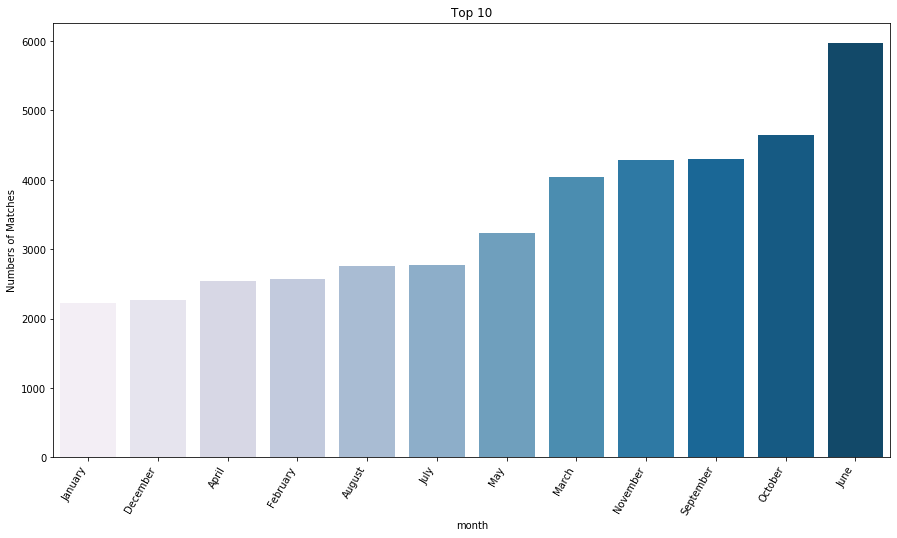

In [184]:
fig, (ax1) = plt.subplots(figsize=(15,8))
sns.barplot(month.month,month.date,palette="PuBu", ax=ax1).set_title('Top 10')
ax1.set_xticklabels(month.month, rotation = 60,horizontalalignment='right')
ax1.set(ylabel='Numbers of Matches')


# sns.barplot(bottom.tournament,bottom.date, ax=ax2).set_title('Bottom 10')
# ax2.set(ylabel='Numbers of Matches')
# ax2.set_xticklabels(bottom.tournament, rotation = 60,horizontalalignment='right')
plt.show()


## Task
Which teams played against each other the most?

In [ ]:
playing_teams = []
for i in range(df.shape[0]):
    two_teams = [df.loc[i, 'home_team'], df.loc[i, 'away_team']]
    two_teams.sort()
    playing_teams.append(tuple(two_teams))
common_playing_teams = Counter(playing_teams).most_common(20)
common_playing_teams = [(' x '.join(a), b) for a,b in common_playing_teams]
df_common_playing_teams = pd.DataFrame(common_playing_teams, columns=['Teams', 'matches'])
df_common_playing_teams.index = df_common_playing_teams.Teams
df_common_playing_teams.drop('Teams', axis=1, inplace=True)
df_common_playing_teams.reset_index(inplace=True)

In [6]:
playing_teams = []
for i in range(df.shape[0]):
    two_teams = [df.loc[i, 'home_team'], df.loc[i, 'away_team']]
    two_teams.sort() #take care of the order of apprences
    playing_teams.append(tuple(two_teams))


In [22]:
from collections import Counter
playing_teams
common_playing_teams = Counter(playing_teams).most_common(20)
common_playing_teams
common_playing_teams = [(' x '.join(a), b) for a,b in common_playing_teams]
common_playing_teams

[('Argentina x Uruguay', 176),
 ('Austria x Hungary', 133),
 ('Belgium x Netherlands', 125),
 ('England x Scotland', 116),
 ('Norway x Sweden', 107),
 ('Kenya x Uganda', 107),
 ('Scotland x Wales', 106),
 ('Denmark x Sweden', 106),
 ('Argentina x Brazil', 104),
 ('England x Wales', 103),
 ('Argentina x Paraguay', 101),
 ('England x Northern Ireland', 99),
 ('Northern Ireland x Scotland', 95),
 ('Northern Ireland x Wales', 94),
 ('Finland x Sweden', 89),
 ('Argentina x Chile', 88),
 ('Denmark x Norway', 85),
 ('Chile x Peru', 79),
 ('Chile x Uruguay', 78),
 ('Brazil x Paraguay', 78)]

In [28]:
df_common_playing_teams = pd.DataFrame(common_playing_teams, columns=['Teams', 'matches'])
df_common_playing_teams
df_common_playing_teams.index = df_common_playing_teams.Teams
df_common_playing_teams.drop('Teams', axis=1, inplace=True)

df_common_playing_teams.reset_index(inplace=True)
df_common_playing_teams

,Teams,matches
0,Argentina x Uruguay,176
1,Austria x Hungary,133
2,Belgium x Netherlands,125
3,England x Scotland,116
4,Norway x Sweden,107
5,Kenya x Uganda,107
6,Scotland x Wales,106
7,Denmark x Sweden,106
8,Argentina x Brazil,104
9,England x Wales,103


In [14]:
# tes=[('ba','cat'),('cat','ba'),('cat','dog'),('dog','fish'),('dog','fish')]
# Counter(tes)
sorted(('cat','ba'))

['ba', 'cat']

## Task
Apply your creativity to show some additional insights from the data.

## Task (Stretch)
Create these graphs in Tableau as well.